# Tram Boarding Analysis with Image Recognition

In [6]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def get_faces(filename, show=False):
    image = face_recognition.load_image_file(filename)
    faces = face_recognition.face_locations(image)
    encodings = []
    for f in faces:
        sub_image = image[f[0]:f[2], f[3]:f[1]]
        encoding = face_recognition.face_encodings(sub_image)
        if len(encoding) == 1:
            encodings += encoding
        else:
            encodings.append(np.zeros(128))
    if show:
        plt.figure(figsize=(12, 8))
        plt.imshow(image)
        for f in faces:
            plt.plot([f[1], f[1], f[3], f[3], f[1]], [f[0], f[2], f[2], f[0], f[0]])
        plt.show()
    return faces, encodings

In [3]:
def show_nth_faces(filename, faces_position, n):
    image = face_recognition.load_image_file(filename)
    f = faces_position[n]
    sub_image = image[f[0]:f[2], f[3]:f[1]]
    plt.imshow(sub_image)
    plt.show()

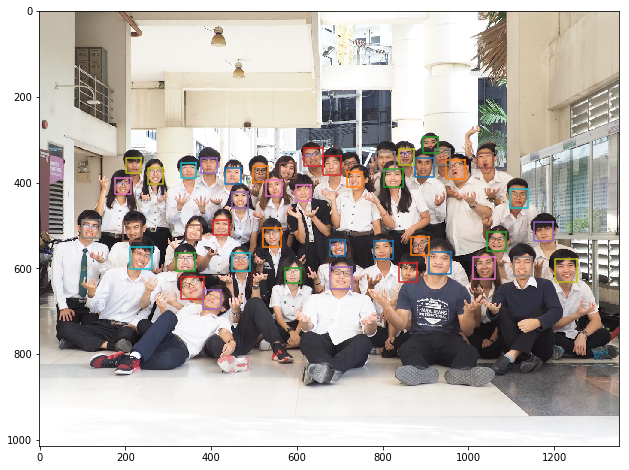

In [4]:
faces_cpe = get_faces('images/cpe30_1.jpg', show=True)

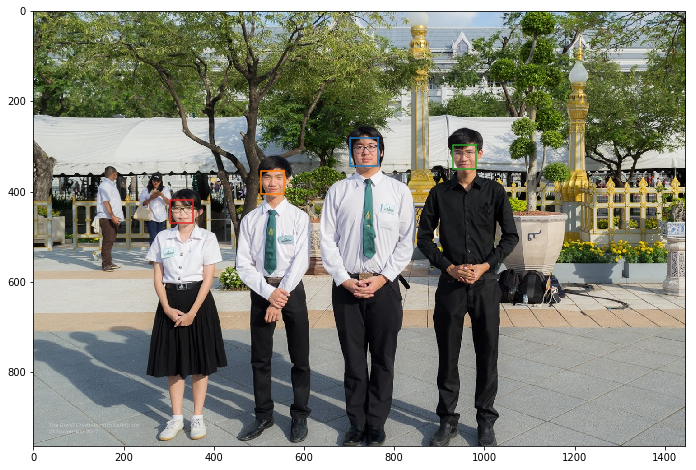

In [5]:
faces_cremen = get_faces('images/cremen_1.jpg', show=True)

In [6]:
for i, face in enumerate(faces_cpe[1]):
    print(i, face_recognition.compare_faces(faces_cremen[1], face, tolerance=0.475))

0 [False, False, False, False]
1 [False, False, False, False]
2 [False, False, False, False]
3 [False, True, False, False]
4 [False, False, False, False]
5 [False, False, False, False]
6 [False, False, False, False]
7 [False, False, False, False]
8 [False, False, False, False]
9 [False, False, False, False]
10 [False, False, False, False]
11 [False, False, False, False]
12 [False, False, False, False]
13 [False, False, False, False]
14 [False, True, False, False]
15 [False, False, False, True]
16 [False, False, False, False]
17 [False, False, False, False]
18 [False, True, True, False]
19 [False, False, False, False]
20 [False, False, False, False]
21 [False, False, False, False]
22 [False, False, False, True]
23 [False, False, False, False]
24 [False, False, False, False]
25 [False, False, False, True]
26 [False, False, False, True]
27 [False, False, False, True]
28 [False, False, False, False]
29 [False, False, True, False]
30 [False, True, False, False]
31 [False, False, False, Fals

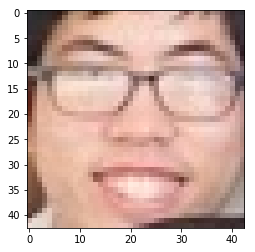

In [7]:
show_nth_faces('images/cpe30_1.jpg', faces_cpe[0], 32)

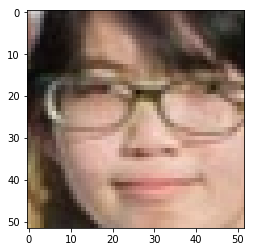

In [8]:
show_nth_faces('images/cremen_1.jpg', faces_cremen[0], 3)

In [11]:
def get_stat(photo_before, photo_after, tolerance=0.5, debug=False):
    faces_before, encodings_before = get_faces(photo_before, show=True)
    faces_after, encodings_after = get_faces(photo_after, show=True)
    before_count = len(faces_before)
    after_ccount = len(faces_after)
    results = []
    for i, face in enumerate(encodings_after):
        result = face_recognition.compare_faces(encodings_before, face, tolerance=tolerance)
        if debug:
            print(i, result)
        results.append(result)
    get_on_count = 0
    for face in np.array(results):
        if True not in face:
            get_on_count += 1
    got_off_count = before_count + get_on_count - after_count
    return [before_count, get_on_count, got_off_count, after_count]

In [18]:
get_faces("new.jpg")

128


([(348, 913, 811, 451)],
 [array([-0.08292035,  0.15916213,  0.05204906, -0.05704945, -0.05580831,
         -0.02720563, -0.04585141, -0.13220394,  0.12371072, -0.0528934 ,
          0.25035936, -0.07185583, -0.17255615, -0.12550905, -0.03891008,
          0.20906535, -0.18854633, -0.11142858, -0.08844861, -0.06797849,
          0.06844946, -0.03765067, -0.00888728,  0.04275534, -0.08977275,
         -0.38654098, -0.12149126, -0.10378399,  0.06394407, -0.10304243,
         -0.06362884,  0.03999413, -0.1426017 , -0.05153624, -0.00677704,
          0.10295603, -0.02292703, -0.07327229,  0.14143731, -0.03140344,
         -0.16084939,  0.0467887 ,  0.04803912,  0.26383507,  0.25292331,
          0.0213929 ,  0.08624505, -0.07472973,  0.08824068, -0.10991369,
          0.03087239,  0.09689082,  0.08226024,  0.11025018, -0.02330465,
         -0.14926742,  0.00083385,  0.15770158, -0.14310949,  0.0394445 ,
          0.09971058, -0.15902919, -0.08446868, -0.03072845,  0.25577769,
          0.1